In [108]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
import warnings
warnings.filterwarnings("ignore")

In [109]:
df=pd.read_csv('/content/gurgaon_property_data_after_Bivariate-&-multivariate-analysis')
df.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,2,4.0,West,Relatively New Property,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,2,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,1,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,1,2.0,NaN,undefined,NaN,NaN,1200.0,1,0,0,0,0,0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3+,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0.0


In [110]:
df.duplicated().sum()

0

In [111]:
df.shape

(3698, 23)

##`Price`

<Axes: xlabel='price', ylabel='Count'>

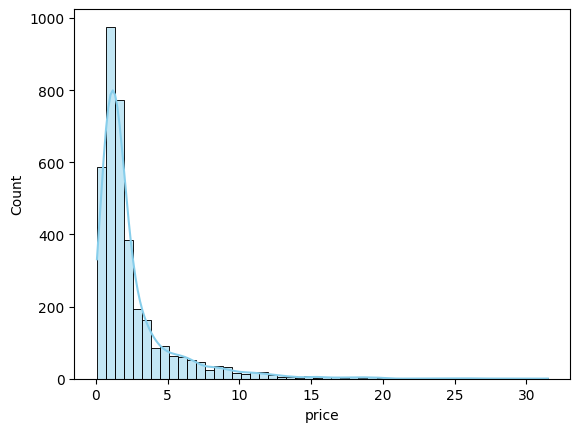

In [112]:
sns.histplot(df['price'],kde=True,bins=50,color='skyblue')

In [113]:
# Boxplot
box_fig = px.box(
    x=df['price'],
    title='Boxplot of Price',
    template='plotly_white'
)
box_fig.show()

In [114]:
## checking ouliers in price column
outliers=df[(df['price']<0.08)| (df['price']>5.35)  ]

In [115]:
outliers.shape[0]

426

In [116]:
outliers['price'].describe()

,price
count,426.000000
mean,9.174977
std,4.046447
min,5.400000
25%,6.400000
50%,8.000000
75%,10.550000
max,31.500000


In [117]:
outliers[outliers['Property_type']=='flat'].shape

(84, 23)

In [118]:
outliers.to_excel('outliers_price_data.xlsx',index=False)

In [119]:
outliers.sort_values('price',ascending=False).head(20)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3613,house,arjun marg/ sector-,sector 26,31.50,35000.0,9000.00,Plot area 1000(836.13 sq.m.),7.0,9.0,3,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,81.0
3392,house,Independent,sector 43,27.50,24366.0,11286.22,Plot area 1254(1048.5 sq.m.),6.0,7.0,2,3.0,North-East,Relatively New Property,NaN,1254.0,NaN,1,1,0,1,1,2,123.0
3383,house,Independent,sector 26,26.00,82540.0,3149.99,Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.),16.0,16.0,2,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,160.0
3424,house,dlf city plots,sector 26,26.00,57206.0,4544.98,Plot area 505(422.24 sq.m.),6.0,7.0,3,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,2,97.0
3553,house,suncity township,sector 54,25.00,31111.0,8035.74,Plot area 1000(836.13 sq.m.),4.0,4.0,2,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,71.0
3349,house,emaar the palm springs,sector 54,24.00,60000.0,400.00,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,28.0
3539,house,Independent,sector 26,23.00,25556.0,8999.84,Plot area 1000(836.13 sq.m.),4.0,4.0,3,2.0,South-West,Relatively New Property,NaN,1000.0,NaN,1,1,1,1,0,1,110.0
3367,house,vipul tatvam villa,sector 48,22.00,26667.0,8249.90,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,38.0
3470,house,Independent,sector 26,20.00,44444.0,4500.05,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New Property,NaN,500.0,NaN,0,1,0,1,0,2,160.0
3342,house,dlf city plots,sector 26,20.00,44265.0,4518.24,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,1,110.0


In [120]:
outliers.sort_values('price',ascending=False).tail(20)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3542,house,Independent,sector 23,5.50,21825.0,2520.050000,Plot area 280(234.12 sq.m.),8.0,8.0,3+,3.0,East,Moderately Old,NaN,280.00,NaN,1,1,0,1,0,1,36.0
3549,house,Independent,sector 54,5.50,38194.0,1440.020000,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New Property,NaN,160.00,NaN,0,1,0,0,0,2,54.0
3438,house,Independent,sector 43,5.50,2716.0,20250.370000,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8.0,7.0,3,3.0,East,Moderately Old,NaN,2850.00,2250.0,1,1,0,1,1,2,73.0
3407,house,Independent,sector 46,5.50,23061.0,2384.980000,Plot area 265(221.57 sq.m.),8.0,8.0,3,3.0,NaN,Moderately Old,NaN,265.00,NaN,1,0,0,0,1,1,49.0
3328,house,Independent,sohna road road,5.50,5093.0,10799.140000,Plot area 1200(1003.35 sq.m.)Built Up area: 3500 sq.yards (2926.45 sq.m.),3.0,3.0,3+,2.0,West,Moderately Old,NaN,3500.00,NaN,1,1,0,1,1,1,35.0
3326,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.000000,Plot area 1000(92.9 sq.m.),3.0,3.0,3+,1.0,NaN,Moderately Old,NaN,1000.00,NaN,0,0,0,0,0,0,38.0
3197,house,housing board colony,sector 28,5.50,30556.0,1799.970000,Plot area 200(167.23 sq.m.),4.0,3.0,2,2.0,North,Old Property,NaN,200.00,NaN,0,0,0,1,1,1,46.0
3196,house,Independent,sector 23,5.50,13095.0,4200.080000,Plot area 4200(390.19 sq.m.),9.0,9.0,1,3.0,South,Moderately Old,NaN,4200.00,NaN,0,1,0,0,1,1,0.0
3185,house,ardee city,sector 52,5.50,183333.0,300.000000,Plot area 300(27.87 sq.m.),9.0,9.0,3,3.0,South,Moderately Old,NaN,300.00,NaN,0,1,0,1,1,2,0.0
2970,house,Independent,sector 43,5.50,28424.0,1934.980000,Plot area 215(179.77 sq.m.),1.0,1.0,3+,1.0,South-West,Old Property,NaN,215.00,NaN,0,0,0,0,1,1,0.0


##`After observing i can say that there are genuine outliers and some data errors as well in price column`

##`Price_per_sqrt`

<Axes: xlabel='Price_per_sqrt', ylabel='Count'>

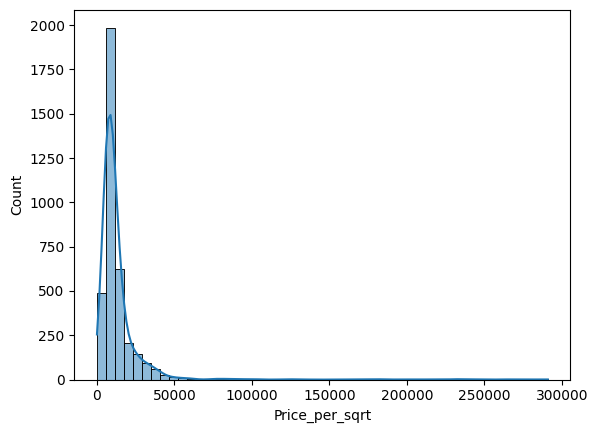

In [121]:
sns.histplot(df['Price_per_sqrt'],kde=True,bins=50)

In [122]:
# Boxplot
box_fig = px.box(
    x=df['Price_per_sqrt'],
    title='Boxplot of Price',
    template='plotly_white'
)
box_fig.show()

In [123]:
## checking ouliers in price_per_sqft column
outliers_price_per_sqft=df[(df['Price_per_sqrt']<4) |(df['Price_per_sqrt']>24390)]
outliers_price_per_sqft.shape

(355, 23)

In [124]:
outliers_price_per_sqft['Price_per_sqrt'].describe()

,Price_per_sqrt
count,355.000000
mean,47948.662535
std,45647.953668
min,24455.000000
25%,28150.500000
50%,33333.000000
75%,41666.000000
max,290948.000000


In [125]:
## i have figure it out that area where value is less then 100 , can be correct by multiplying by 10
outliers_price_per_sqft[outliers_price_per_sqft['Area']<=100]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2068,flat,housing board colony,sector 51,0.30,41666.0,72.001152,Carpet area: 72 (6.69 sq.m.),1.0,1.0,2,0.0,NaN,Moderately Old,NaN,NaN,72.0,1,0,0,0,0,0,24.0
2959,house,Independent,sector 4,0.58,86567.0,67.000000,Plot area 67(6.22 sq.m.),2.0,2.0,2,2.0,West,Moderately Old,NaN,67.0,NaN,0,0,0,1,1,1,0.0
2960,house,Independent,sector 4,0.65,92857.0,70.000000,Plot area 70(6.5 sq.m.),1.0,1.0,3,1.0,South-East,Moderately Old,NaN,70.0,NaN,0,0,0,0,1,1,0.0
2961,house,Independent,sector 4,0.61,100000.0,61.000000,Plot area 61(5.67 sq.m.),2.0,2.0,3,2.0,South-East,Moderately Old,NaN,61.0,NaN,0,0,0,0,1,1,0.0
2962,house,Independent,sector 4,0.67,88157.0,76.000000,Plot area 76(7.06 sq.m.),3.0,3.0,2,2.0,South,Relatively New Property,NaN,76.0,NaN,0,0,0,0,1,0,24.0
3034,house,Independent,sector 28,0.45,90000.0,50.000000,Built Up area: 50 (4.65 sq.m.),5.0,3.0,3,1.0,NaN,undefined,NaN,50.0,NaN,0,0,0,0,0,1,9.0
3065,house,"bhim nagar, sector 6",sector 6,0.85,126865.0,67.000000,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,0.0
3078,house,Independent,sector 105,0.50,50000.0,100.000000,Built Up area: 100 (9.29 sq.m.),2.0,2.0,0,1.0,NaN,undefined,NaN,100.0,NaN,0,0,0,0,0,0,49.0
3114,house,Independent,sector 104,0.80,80000.0,100.000000,Plot area 100(9.29 sq.m.),13.0,6.0,3+,3.0,South,Moderately Old,NaN,100.0,NaN,1,1,0,1,1,0,111.0
3117,house,rk excelo,sector 12,0.60,120000.0,50.000000,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.ft. (2.79 sq.m.)Carpet area: 15 sq.ft. (1.39 sq.m.),5.0,3.0,3+,3.0,North,Moderately Old,NaN,30.0,15.0,0,0,0,0,1,0,106.0


In [126]:
index=outliers_price_per_sqft[outliers_price_per_sqft['Area']<=100].index
index

Index([2068, 2959, 2960, 2961, 2962, 3034, 3065, 3078, 3114, 3117, 3133, 3145,
       3171, 3205, 3211, 3277, 3306, 3363],
      dtype='int64')

In [127]:
outliers_price_per_sqft['Area']=outliers_price_per_sqft['Area'].apply(lambda x:x*9 if x<=100 else x)

In [128]:
outliers_price_per_sqft[outliers_price_per_sqft['Area']<=1000].shape

(77, 23)

In [129]:
indices=outliers_price_per_sqft[(outliers_price_per_sqft['Area']<=1000) & (~outliers_price_per_sqft.index.isin(index))].index

In [130]:
indices

Index([  29, 2237, 2800, 2861, 2863, 2969, 2978, 2981, 2995, 3000, 3029, 3031,
       3032, 3041, 3055, 3066, 3088, 3106, 3110, 3113, 3115, 3119, 3123, 3126,
       3132, 3160, 3166, 3167, 3179, 3185, 3193, 3230, 3248, 3291, 3295, 3321,
       3322, 3326, 3349, 3351, 3369, 3385, 3388, 3402, 3403, 3447, 3458, 3468,
       3568, 3575, 3586, 3589, 3610, 3618, 3630, 3648, 3663, 3683, 3697],
      dtype='int64')

In [131]:
outliers_price_per_sqft['Area'] = outliers_price_per_sqft.apply(
    lambda row: row['Area'] * 9 if row.name in indices else row['Area'], axis=1
)
outliers_price_per_sqft['Area']

,Area
29,5346.005346
238,2946.428571
243,1600.030118
270,1381.985695
293,1174.380439
400,3980.046699
421,1717.058604
444,1459.022811
645,3100.076093
923,2704.001923


In [132]:
outliers_price_per_sqft['Price_per_sqrt']=round(((outliers_price_per_sqft['price']*10000000)/outliers_price_per_sqft['Area']))

In [133]:
px.box(outliers_price_per_sqft['Price_per_sqrt'])

In [134]:
outliers_price_per_sqft[outliers_price_per_sqft.index.isin(index)]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2068,flat,housing board colony,sector 51,0.30,4630.0,648.010368,Carpet area: 72 (6.69 sq.m.),1.0,1.0,2,0.0,NaN,Moderately Old,NaN,NaN,72.0,1,0,0,0,0,0,24.0
2959,house,Independent,sector 4,0.58,9619.0,603.000000,Plot area 67(6.22 sq.m.),2.0,2.0,2,2.0,West,Moderately Old,NaN,67.0,NaN,0,0,0,1,1,1,0.0
2960,house,Independent,sector 4,0.65,10317.0,630.000000,Plot area 70(6.5 sq.m.),1.0,1.0,3,1.0,South-East,Moderately Old,NaN,70.0,NaN,0,0,0,0,1,1,0.0
2961,house,Independent,sector 4,0.61,11111.0,549.000000,Plot area 61(5.67 sq.m.),2.0,2.0,3,2.0,South-East,Moderately Old,NaN,61.0,NaN,0,0,0,0,1,1,0.0
2962,house,Independent,sector 4,0.67,9795.0,684.000000,Plot area 76(7.06 sq.m.),3.0,3.0,2,2.0,South,Relatively New Property,NaN,76.0,NaN,0,0,0,0,1,0,24.0
3034,house,Independent,sector 28,0.45,10000.0,450.000000,Built Up area: 50 (4.65 sq.m.),5.0,3.0,3,1.0,NaN,undefined,NaN,50.0,NaN,0,0,0,0,0,1,9.0
3065,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.000000,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,0.0
3078,house,Independent,sector 105,0.50,5556.0,900.000000,Built Up area: 100 (9.29 sq.m.),2.0,2.0,0,1.0,NaN,undefined,NaN,100.0,NaN,0,0,0,0,0,0,49.0
3114,house,Independent,sector 104,0.80,8889.0,900.000000,Plot area 100(9.29 sq.m.),13.0,6.0,3+,3.0,South,Moderately Old,NaN,100.0,NaN,1,1,0,1,1,0,111.0
3117,house,rk excelo,sector 12,0.60,13333.0,450.000000,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.ft. (2.79 sq.m.)Carpet area: 15 sq.ft. (1.39 sq.m.),5.0,3.0,3+,3.0,North,Moderately Old,NaN,30.0,15.0,0,0,0,0,1,0,106.0


In [135]:
outliers_price_per_sqft['Price_per_sqrt'].describe()

,Price_per_sqrt
count,355.000000
mean,29259.918310
std,12384.926632
min,2723.000000
25%,25559.000000
50%,29861.000000
75%,35543.000000
max,82540.000000


In [136]:
df.update(outliers_price_per_sqft)

In [137]:
df['Price_per_sqrt'].describe()

,Price_per_sqrt
count,3698.000000
mean,11625.300162
std,8068.212894
min,4.000000
25%,6741.250000
50%,8920.000000
75%,13428.750000
max,82540.000000


In [138]:
px.box(df['Price_per_sqrt'])

<Axes: xlabel='Price_per_sqrt', ylabel='Count'>

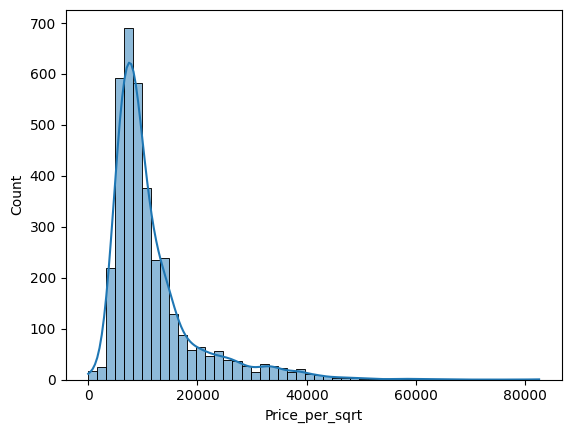

In [139]:
sns.histplot(df['Price_per_sqrt'],kde=True,bins=50)

In [140]:
df[df['Price_per_sqrt']==82540.000000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3383,house,Independent,sector 26,26.0,82540.0,3149.99,Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.),16.0,16.0,2,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,160.0


In [141]:
(26*10000000)/31499.9

8253.99445712526

In [142]:
### one more improvement
df.loc[3383,'Area']=31499.9

In [143]:
df.loc[3383,'Price_per_sqrt']=8254.0

In [144]:
df['Price_per_sqrt'].describe()

,Price_per_sqrt
count,3698.000000
mean,11605.212006
std,7983.637411
min,4.000000
25%,6741.250000
50%,8918.500000
75%,13421.250000
max,66667.000000


In [145]:
px.box(df['Price_per_sqrt'])

In [146]:
index=df[(df['Price_per_sqrt']>50000) & (df['bedRoom']>10)].index
index

Index([3062, 3341, 3578, 3672], dtype='int64')

In [147]:
df['Price_per_sqrt'] =df.apply(
    lambda row: row['Price_per_sqrt']/10 if row.name in index else row['Price_per_sqrt'], axis=1
)

In [148]:
px.box(df['Price_per_sqrt'])

In [149]:
df[(df['Price_per_sqrt']>50000)]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2586,flat,unitech vistas,sector 70,9.0,57507.0,1565.026866,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,2,7.0,NaN,undefined,NaN,1565.0,NaN,0,0,0,0,0,0,58.0
3213,house,project housing board colony,sector 31,8.0,63492.0,1260.000000,Built Up area: 140 (117.06 sq.m.),2.0,1.0,3,1.0,NaN,undefined,NaN,140.0,NaN,0,0,0,0,0,1,0.0
3349,house,emaar the palm springs,sector 54,24.0,66667.0,3600.000000,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,28.0
3424,house,dlf city plots,sector 26,26.0,57206.0,4544.980000,Plot area 505(422.24 sq.m.),6.0,7.0,3,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,2,97.0
3503,house,emaar the palm springs,sector 54,14.0,62222.0,2250.010000,Plot area 250(209.03 sq.m.),4.0,5.0,1,2.0,North,Old Property,NaN,250.0,NaN,1,1,0,0,0,1,17.0
3566,house,emaar mgf marbella,sector 66,18.0,55556.0,3239.970000,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,360.0,NaN,1,1,0,1,0,2,29.0
3605,house,unitech escape,sector 50,10.8,60000.0,1800.000000,Plot area 290(242.48 sq.m.)Built Up area: 250 sq.yards (209.03 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),4.0,4.0,1,2.0,North,Relatively New Property,NaN,250.0,200.0,1,1,1,1,0,1,80.0


In [150]:
df[(df['Price_per_sqrt']<=50000)].shape

(3691, 23)

In [151]:
df=df[(df['Price_per_sqrt']<=50000)]

#`Area`

In [152]:
df['Area'].describe()

,Area
count,3691.000000
mean,1968.058662
std,1424.242889
min,145.010000
25%,1250.601540
50%,1743.050338
75%,2323.923354
max,31499.900000


<Axes: xlabel='Area', ylabel='Count'>

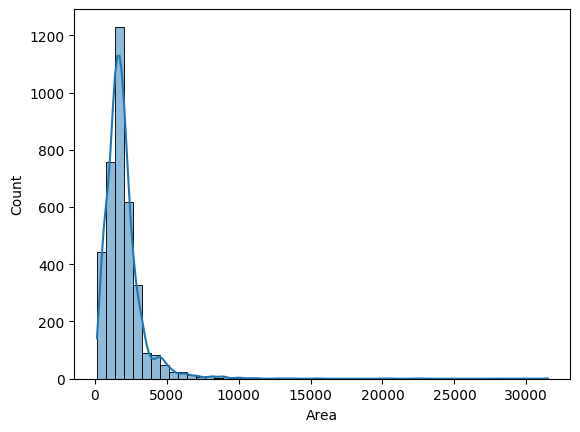

In [153]:
sns.histplot(df['Area'],kde=True,bins=50)

In [154]:
px.box(df['Area'])

In [155]:
df[df['Area']>10000].sort_values(by='Area',ascending=False)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3383,house,Independent,sector 26,26.00,8254.0,31499.900000,Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.),16.0,16.0,2,4.0,North-West,New Property,NaN,400.0,350.00,1,1,1,1,0,2,160.0
2965,house,Independent,sector 57,6.25,2778.0,22498.200000,Plot area 3100(2591.99 sq.m.)Built Up area: 2660 sq.yards (2224.1 sq.m.)Carpet area: 2500 sq.yards (2090.32 sq.m.),9.0,9.0,1,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,12.0
3438,house,Independent,sector 43,5.50,2716.0,20250.370000,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8.0,7.0,3,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,73.0
2972,house,unitech aspen greens,sector 50,6.95,4490.0,15478.840000,Plot area 240(200.67 sq.m.)Built Up area: 2160 sq.yards (1806.04 sq.m.)Carpet area: 1720 sq.yards (1438.14 sq.m.),3.0,3.0,3+,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,0.0
2958,house,Independent,sector 4,0.85,630.0,13492.060000,Plot area 1500(1254.19 sq.m.),3.0,3.0,2,1.0,North,Relatively New Property,NaN,1500.0,NaN,0,0,0,0,1,0,0.0
2718,flat,godrej icon,sector 88a,1.75,1384.0,12644.508671,Carpet area: 1175.11,3.0,3.0,1,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,53.0
3392,house,Independent,sector 43,27.50,24366.0,11286.220000,Plot area 1254(1048.5 sq.m.),6.0,7.0,2,3.0,North-East,Relatively New Property,NaN,1254.0,NaN,1,1,0,1,1,2,123.0
1609,flat,m3m golfestate,sector 65,13.20,12000.0,11000.000000,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,1,55.0
3328,house,Independent,sohna road road,5.50,5093.0,10799.140000,Plot area 1200(1003.35 sq.m.)Built Up area: 3500 sq.yards (2926.45 sq.m.),3.0,3.0,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,0,1,1,1,35.0


In [156]:
# df[df.index.isin([3383,2965,3438,2972])]['Area']

In [157]:
# df.loc[[3383, 2965, 3438, 2972], 'Built_Up_area'] = df.loc[[3383, 2965, 3438, 2972], 'Built_Up_area'] * 9

In [158]:
df[~(df['Area']>10000)].shape

(3682, 23)

In [159]:
df=df[~(df['Area']>10000)]

<Axes: xlabel='Area', ylabel='Count'>

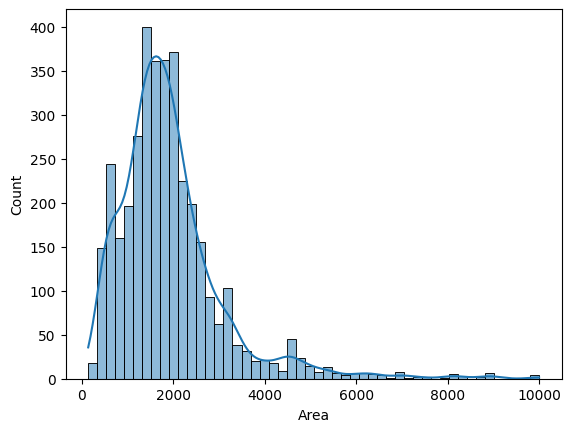

In [160]:
## final dist of cleaned area
sns.histplot(df['Area'],kde=True,bins=50)

In [161]:
## final dist of cleaned area
px.box(df['Area'])

In [162]:
df['Area'].describe()

,Area
count,3682.000000
mean,1932.415883
std,1185.897712
min,145.010000
25%,1250.000000
50%,1741.179086
75%,2313.695465
max,10000.000000


In [163]:
df.shape

(3682, 23)

In [164]:
df[df['Area']==10000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
644,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3,23.0,North-East,Relatively New Property,10000.0,NaN,NaN,0,1,0,1,1,0,49.0
1603,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4.0,4.0,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0,1,0,0,0,1,31.0
3080,house,Independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3.0,9.0,1,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0.0
3598,house,Independent,sector 26,18.25,18250.0,10000.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq.ft. (929.03 sq.m.),7.0,9.0,2,4.0,East,Relatively New Property,NaN,NaN,10000.0,1,1,1,1,0,1,28.0


In [165]:
df['Price_per_sqrt']=round(((df['price']*10000000)/df['Area']))

In [166]:
df['Price_per_sqrt'].describe()

,Price_per_sqrt
count,3682.000000
mean,11595.360674
std,8280.897757
min,544.000000
25%,6758.000000
50%,8920.000000
75%,13392.000000
max,200000.000000


In [167]:
df=df[~(df['Price_per_sqrt']>58000)]

<Axes: xlabel='Price_per_sqrt', ylabel='Count'>

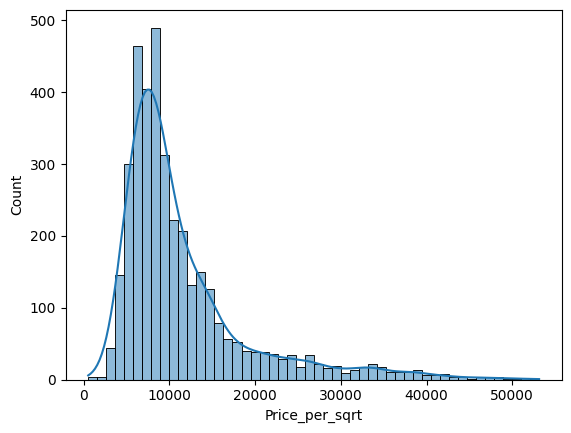

In [168]:
## final dist of cleaned area
sns.histplot(df['Price_per_sqrt'],kde=True,bins=50)

In [169]:
px.box(df['Price_per_sqrt'])

In [170]:
df.select_dtypes('number').corr()['price'].sort_values()

,price
floorNum,-0.084136
Others,-0.013852
luxury_score,0.012441
Built_Up_area,0.146979
Study Room,0.249358
furnish_type,0.259133
Store Room,0.313329
Pooja Room,0.334751
Servant Room,0.404366
bedRoom,0.523209


##`Bedroom`

<Axes: xlabel='bedRoom', ylabel='Density'>

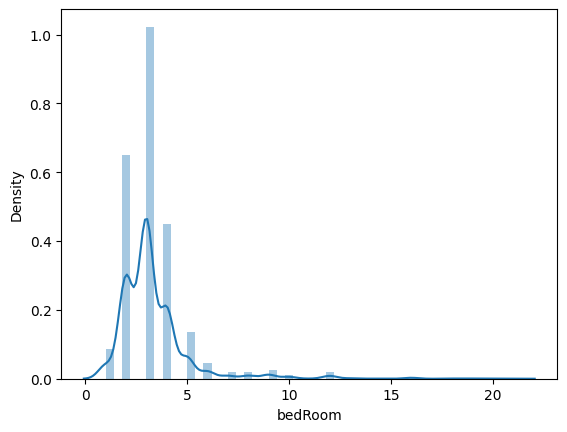

In [171]:
sns.distplot(df['bedRoom'])

In [172]:
df['bedRoom'].describe()

,bedRoom
count,3680.000000
mean,3.320924
std,1.839732
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [173]:
df[df['bedRoom']>10].sort_values(by='bedRoom',ascending=False).shape

(48, 23)

In [174]:
df=df[~(df['bedRoom']>10)]

<Axes: xlabel='bedRoom', ylabel='Density'>

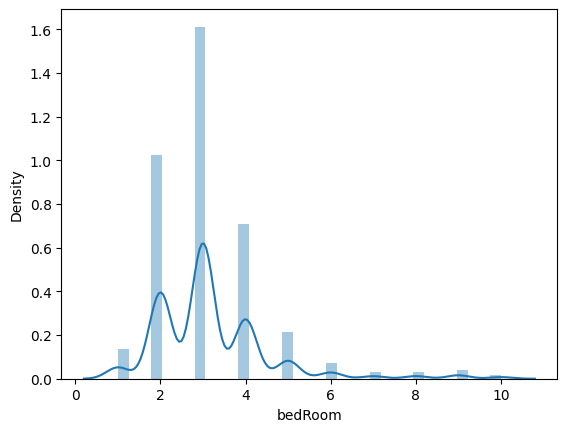

In [175]:
sns.distplot(df['bedRoom'])

In [176]:
df['bedRoom'].describe()

,bedRoom
count,3632.000000
mean,3.183095
std,1.372633
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


<Axes: xlabel='bathroom', ylabel='Count'>

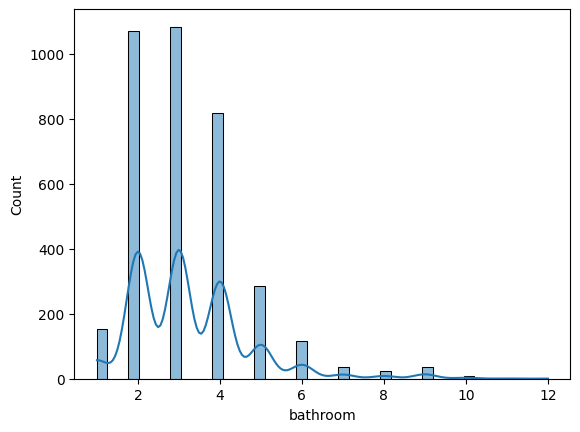

In [177]:
## bathroom
sns.histplot(df['bathroom'],kde=True)

In [178]:
## they are coorrect acc. to website
df[df['bathroom']>10].sort_values(by='bathroom',ascending=False)

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3288,house,adani brahma samsara,sector 60,18.02,28200.0,6390.07,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,1,3.0,North-East,Relatively New Property,NaN,6390.0,NaN,0,1,0,0,0,1,42.0
3233,house,Independent,sector 39,7.00,10000.0,7000.00,Plot area 350(32.52 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),10.0,11.0,1,4.0,South-East,Relatively New Property,NaN,7000.0,NaN,0,0,0,1,0,2,0.0
3287,house,Independent,sector 24,11.00,28898.0,3806.49,Plot area 3806.45(353.63 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.),8.0,11.0,3,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,0.0


In [179]:
df[df['Property_type']=='house'][['Area','Built_Up_area','areaWithType']]

,Area,Built_Up_area,areaWithType
2860,2609.99,290.00,Plot area 290(242.48 sq.m.)
2861,4941.09,61.00,Plot area 61(51 sq.m.)
2865,3240.00,3240.00,Plot area 360(301.01 sq.m.)
2867,2844.04,316.00,Plot area 316(264.22 sq.m.)
2868,1935.10,215.00,Plot area 215(179.77 sq.m.)
2869,1350.00,1350.00,Plot area 150(125.42 sq.m.)
2870,3239.97,360.00,Plot area 360(301.01 sq.m.)
2872,4518.07,502.00,Plot area 502(419.74 sq.m.)
2873,2699.96,300.00,Plot area 300(250.84 sq.m.)
2874,3600.01,400.00,Plot area 400(334.45 sq.m.)


#`super_buildup_area`

In [180]:
df['Super_Built_up_area'].describe()

,Super_Built_up_area
count,1892.000000
mean,1926.069372
std,765.884094
min,161.000000
25%,1471.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='Super_Built_up_area', ylabel='Count'>

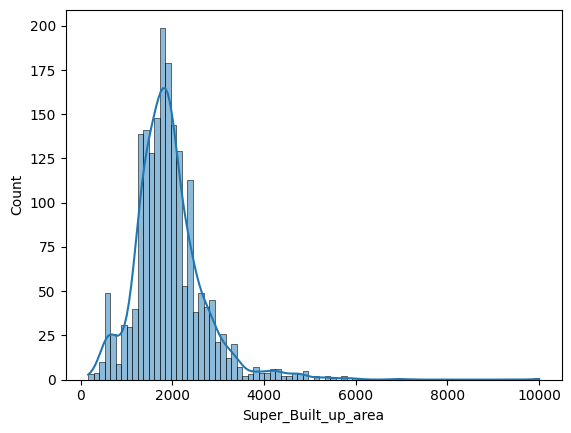

In [181]:
sns.histplot(df['Super_Built_up_area'],kde=True)

In [182]:
px.box(df['Super_Built_up_area'])

In [183]:
## they are true acc to website
df[df['Super_Built_up_area']>6000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
644,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.000000,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3,23.0,North-East,Relatively New Property,10000.0,NaN,NaN,0,1,0,1,1,0,49.0
1515,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.024167,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New Property,6926.0,NaN,NaN,0,1,0,0,0,1,104.0


##`Build_up_area`

In [184]:
df['Built_Up_area'].describe()

,Built_Up_area
count,1618.000000
mean,1474.141228
std,1290.880812
min,14.000000
25%,500.000000
50%,1328.000000
75%,1900.000000
max,9500.000000


<Axes: xlabel='Built_Up_area', ylabel='Count'>

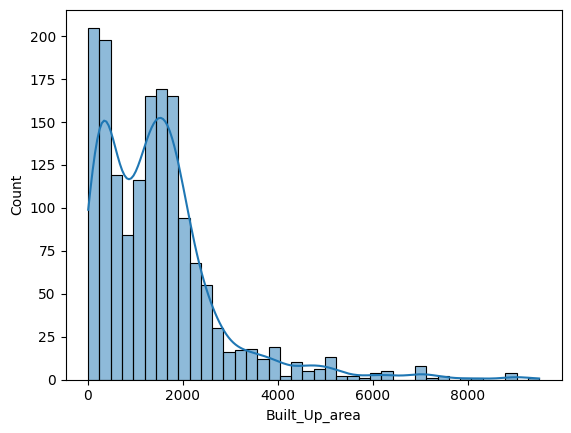

In [185]:
sns.histplot(df['Built_Up_area'],kde=True)

In [186]:
px.box(df['Built_Up_area'])

In [187]:
index=df[df['Built_Up_area']<=200].index
index.shape

(154,)

In [188]:
df[df['Built_Up_area']<=200]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
153,flat,godrej nature plus,sector 33,1.45,15664.0,925.689479,Built Up area: 118 Carpet area: 86 sq.m.,3.0,2.0,3,20.0,NaN,Under Construction,NaN,118.00,86.0,1,0,0,0,0,0,16.0
255,flat,sare crescent parc,sector 92,0.70,5556.0,1259.899208,Built Up area: 140 (117.06 sq.m.),3.0,3.0,3,14.0,NaN,Under Construction,NaN,140.00,NaN,0,0,0,0,0,0,0.0
287,flat,godrej air,sector 85,1.05,10603.0,990.285768,Built Up area: 97 Carpet area: 92 sq.m.,2.0,2.0,2,15.0,East,undefined,NaN,97.00,92.0,0,0,0,0,0,0,104.0
2731,flat,godrej nature plus,sector 33,1.62,13974.0,1159.295835,Built Up area: 129.42 Carpet area: 107.7 sq.m.,3.0,4.0,2,3.0,North,New Property,NaN,129.42,107.7,0,1,0,0,0,0,0.0
2861,house,Independent,sector 43,2.10,4250.0,4941.090000,Plot area 61(51 sq.m.),10.0,10.0,2,5.0,West,New Property,NaN,61.00,NaN,0,1,0,0,0,1,49.0
2875,house,Independent,sector 38,2.10,23333.0,900.010000,Plot area 100(83.61 sq.m.),7.0,7.0,3+,3.0,North-East,Relatively New Property,NaN,100.00,NaN,1,0,1,1,0,0,52.0
2891,house,Independent,sector 7,1.95,13542.0,1439.960000,Plot area 160(133.78 sq.m.),2.0,2.0,3+,2.0,NaN,Old Property,NaN,160.00,NaN,0,0,0,0,0,1,60.0
2892,house,Independent,sector 57,3.30,19097.0,1728.020000,Plot area 192(160.54 sq.m.),4.0,4.0,3,3.0,South-East,Moderately Old,NaN,192.00,NaN,0,0,1,0,0,1,144.0
2896,house,Independent,sector 26,5.80,32222.0,1800.010000,Plot area 200(167.23 sq.m.),5.0,5.0,2,2.0,North,Old Property,NaN,200.00,NaN,1,1,1,1,0,0,49.0
2901,house,nul,sector 25,6.25,34722.0,1800.010000,Plot area 200(167.23 sq.m.),5.0,5.0,3,2.0,East,Moderately Old,NaN,200.00,NaN,0,1,0,1,0,1,136.0


In [189]:
df.loc[2983,'Built_Up_area']=3810

In [190]:
df.loc[index, 'Built_Up_area']=df.loc[index, 'Built_Up_area']*9

In [191]:
index1=df[df['Built_Up_area']<=250].index

In [192]:
df[df['Built_Up_area']<=250]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2868,house,sushant lok,sector 43,1.95,10077.0,1935.10,Plot area 215(179.77 sq.m.),3.0,4.0,3+,4.0,West,New Property,NaN,215.0,NaN,0,1,0,0,0,1,79.0
2876,house,unitech espace,sector 50,7.35,41762.0,1759.97,Plot area 240(200.67 sq.m.),4.0,4.0,3+,3.0,South,Moderately Old,NaN,240.0,NaN,0,1,0,1,0,1,152.0
2882,house,Independent,sector 25,7.60,38760.0,1960.78,Plot area 215(179.77 sq.m.),9.0,9.0,2,4.0,East,Relatively New Property,NaN,215.0,NaN,1,0,1,1,0,2,41.0
2903,house,Independent,sector 43,5.75,29716.0,1934.98,Plot area 215(179.77 sq.m.),4.0,4.0,2,2.0,North,Old Property,NaN,215.0,NaN,0,1,1,1,0,0,0.0
2917,house,Independent,sector 43,6.50,35400.0,1836.16,Plot area 215(179.77 sq.m.)Built Up area: 215 sq.yards (179.77 sq.m.),5.0,4.0,3+,3.0,South-East,Moderately Old,NaN,215.0,NaN,0,1,0,1,0,1,44.0
2923,house,Independent,sector 4,3.25,14444.0,2250.07,Plot area 250(209.03 sq.m.),3.0,3.0,3,2.0,South-East,Old Property,NaN,250.0,NaN,0,0,0,0,0,1,122.0
2938,house,Independent,sector 7,3.10,13778.0,2249.96,Plot area 250(209.03 sq.m.),3.0,3.0,2,2.0,North-West,Old Property,NaN,250.0,NaN,0,0,0,0,0,1,160.0
2950,house,international city by sobha phase 1,sector 109,5.85,26423.0,2213.98,Plot area 246(205.69 sq.m.),4.0,5.0,2,2.0,East,Relatively New Property,NaN,246.0,NaN,0,1,0,0,0,1,0.0
2963,house,ansal sushant lok plots,sector 43,5.80,29974.0,1935.01,Plot area 215(179.77 sq.m.),6.0,6.0,3+,2.0,South-West,Relatively New Property,NaN,215.0,NaN,0,1,0,0,1,1,0.0
2970,house,Independent,sector 43,5.50,28424.0,1934.98,Plot area 215(179.77 sq.m.),1.0,1.0,3+,1.0,South-West,Old Property,NaN,215.0,NaN,0,0,0,0,1,1,0.0


In [193]:
df.loc[index1, 'Built_Up_area']=df.loc[index1, 'Built_Up_area']*9

In [194]:
index2=df[(df['Built_Up_area']<=500) & (df['bedRoom']>3)].index

In [195]:
df.loc[index2, 'Built_Up_area']=df.loc[index2, 'Built_Up_area']*9

In [196]:
index3=df[(df['Built_Up_area']<300)].index

In [197]:
df.loc[index3, 'Built_Up_area']=df.loc[index3, 'Built_Up_area']*9

In [198]:
df[(df['Built_Up_area']<=350) &(df['Property_type']=='house')]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3478,house,Independent,sector 43,8.49,31444.0,2700.04,Plot area 300(250.84 sq.m.),3.0,3.0,3,4.0,North,Relatively New Property,NaN,300.0,NaN,0,1,0,1,0,1,49.0
3563,house,sushant lok,sector 43,13.00,48148.0,2700.01,Plot area 300(250.84 sq.m.),3.0,3.0,1,4.0,North,New Property,NaN,300.0,NaN,0,0,0,1,0,2,114.0


In [199]:
df.loc[[3478,3563], 'Built_Up_area']=df.loc[[3478,3563], 'Built_Up_area']*9

In [200]:
df.loc[2800,'Area']=300

In [201]:
df[df['Built_Up_area']>10000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2983,house,Independent,sector 9a,4.5,14286.0,3149.94,Plot area 14(354.1 sq.m.),9.0,9.0,2,3.0,NaN,Relatively New Property,NaN,34290.0,NaN,1,0,0,1,1,2,24.0


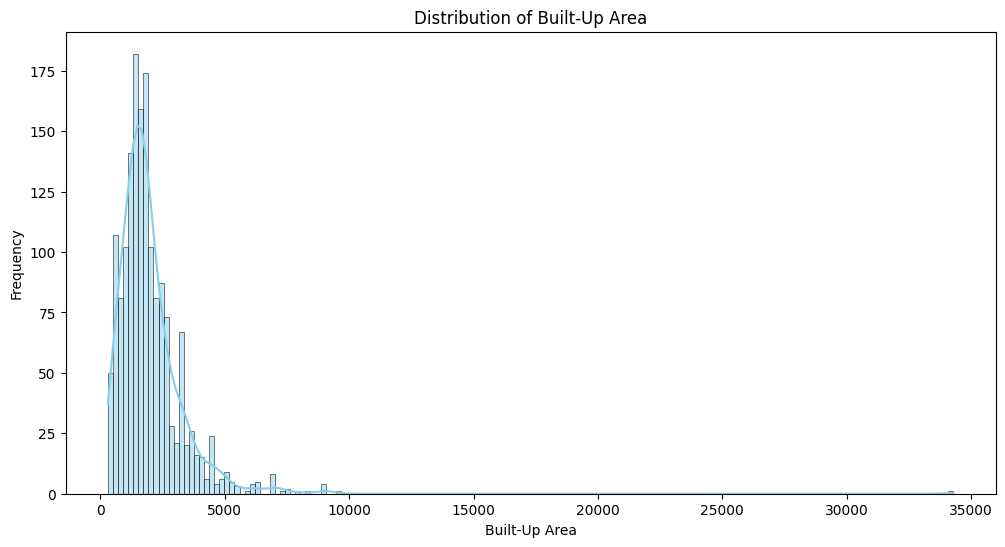

In [202]:
# Plot histplot
plt.figure(figsize=(12, 6))
sns.histplot(df['Built_Up_area'], kde=True, color='skyblue')
plt.title('Distribution of Built-Up Area')
plt.xlabel('Built-Up Area')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot
px.box(df['Built_Up_area'])

In [203]:
df['Built_Up_area'].describe()

,Built_Up_area
count,1618.000000
mean,1980.177915
std,1449.976486
min,300.000000
25%,1200.000000
50%,1700.000000
75%,2400.000000
max,34290.000000


In [204]:
df[df['Area']<200]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3086,house,Independent,sector 17,0.32,22067.0,145.01,Built Up area: 145 (13.47 sq.m.),2.0,2.0,3,3.0,NaN,undefined,NaN,1305.0,NaN,0,0,0,0,0,1,0.0


In [205]:
df.loc[3086,['Area']]=1305

In [206]:
df['Price_per_sqrt']=round(((df['price']*10000000)/df['Area']))

##`carpet_area`

In [211]:
df['Carpet area'].describe()

,Carpet area
count,1880.000000
mean,1414.061928
std,916.333280
min,33.000000
25%,845.000000
50%,1297.500000
75%,1760.000000
max,10000.000000


<Axes: xlabel='Carpet area', ylabel='Count'>

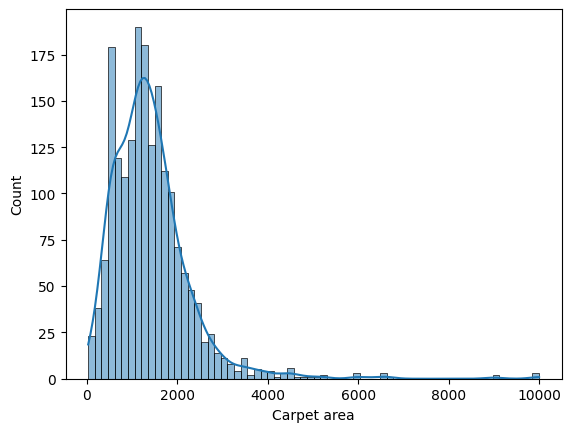

In [212]:
sns.histplot(df['Carpet area'],kde=True)

In [213]:
px.box(df['Carpet area'])

In [219]:
index=df[(df['Carpet area']<500) & (df['Property_type']=='house')].index

In [221]:
df[(df['Carpet area']<500) & (df['Property_type']=='house')]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3044,house,Independent,sector 9,0.22,7407.0,297.02,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,undefined,NaN,NaN,297.0,0,0,0,0,0,0,0.0
3211,house,Independent,sector 105,0.38,8444.0,450.00,Carpet area: 50 (4.65 sq.m.),2.0,2.0,3+,1.0,NaN,undefined,NaN,NaN,450.0,0,0,0,0,0,1,0.0


In [217]:
index

Index([ 153,  255,  287, 2731, 2861, 2875, 2891, 2892, 2896, 2901,
       ...
       3684, 3687, 3688, 3690, 3691, 3692, 3694, 3695, 3696, 3697],
      dtype='int64', length=154)

In [220]:
df.loc[index, 'Carpet area']=df.loc[index, 'Carpet area']*9

In [222]:
df[(df['Carpet area']<500)].shape

(111, 23)

In [230]:
df[(df['Carpet area']<500)]
## 29,176

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
54,flat,pivotal devaan,sector 84,0.30,6666.0,450.045005,Carpet area: 450 (41.81 sq.m.),1.0,1.0,3,14.0,NaN,New Property,NaN,NaN,450.00,0,0,0,0,0,1,37.0
99,flat,hcbs sports ville,sohna road,0.24,7407.0,324.017821,Carpet area: 324 (30.1 sq.m.),1.0,1.0,1,1.0,North,New Property,NaN,NaN,324.00,0,0,0,0,0,0,129.0
103,flat,ramsons kshitij,sector 95,0.32,4500.0,711.111111,Super Built up area 700(65.03 sq.m.)Carpet area: 443.32 sq.ft. (41.19 sq.m.),2.0,2.0,3+,8.0,NaN,Relatively New Property,700.0,NaN,443.32,0,0,0,0,1,1,0.0
105,flat,pareena laxmi apartments,sector 99a,0.32,6106.0,524.074681,Super Built up area 524(48.68 sq.m.)Carpet area: 424.8 sq.ft. (39.47 sq.m.),2.0,2.0,1,2.0,NaN,New Property,524.0,NaN,424.80,0,0,0,0,0,0,66.0
128,flat,mvn athens,sohna road,0.26,5397.0,481.749120,Carpet area: 481.74 (44.76 sq.m.),2.0,2.0,2,2.0,NaN,Relatively New Property,NaN,NaN,481.74,0,0,0,0,0,1,54.0
197,flat,supertech basera,sector 79,0.36,7643.0,471.019233,Built Up area: 546 (50.73 sq.m.)Carpet area: 471 sq.ft. (43.76 sq.m.),2.0,2.0,3,4.0,NaN,New Property,NaN,546.00,471.00,0,0,0,0,0,0,53.0
228,flat,pivotal devaan,sector 84,0.41,7032.0,583.048919,Super Built up area 583(54.16 sq.m.)Built Up area: 565 sq.ft. (52.49 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),2.0,2.0,1,10.0,East,New Property,583.0,565.00,483.00,0,0,0,0,0,1,63.0
322,flat,mvn athens,sohna road,0.27,5897.0,457.859929,Carpet area: 457.81 (42.53 sq.m.),2.0,2.0,2,4.0,South-East,Relatively New Property,NaN,NaN,457.81,0,0,0,0,1,1,24.0
547,flat,signature global solera,sector 107,0.27,5521.0,489.041840,Carpet area: 489 (45.43 sq.m.),2.0,2.0,1,0.0,North-East,Relatively New Property,NaN,NaN,489.00,0,0,0,0,0,0,45.0
548,flat,signature global solera,sector 107,0.28,5674.0,493.479027,Carpet area: 489 (45.43 sq.m.),2.0,2.0,0,6.0,West,Relatively New Property,NaN,NaN,489.00,0,0,0,0,0,0,49.0


In [229]:
# [1904,1915,2032,2244,2279,2394,2498,2643,2670]
df.loc[[1904,1915,2032,2244,2279,2394,2498,2643,2670], 'Carpet area']=df.loc[[1904,1915,2032,2244,2279,2394,2498,2643,2670], 'Carpet area']*9

In [224]:
df.loc[[29,176], 'Carpet area']=df.loc[[29,176], 'Carpet area']*9

In [227]:
indice=df[(df['Carpet area']<500) & (df['bedRoom']>2)].index
df.loc[indice, 'Carpet area']=df.loc[indice, 'Carpet area']*9

In [234]:
df[(df['Carpet area']<500)]['Carpet area'].argmin()

48

In [239]:
df[(df['Carpet area']<500)].sort_values(by='Carpet area')
## 2068,2235,2752

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
1888,flat,ansal api sushant estate,sector 52,0.29,11600.0,250.000000,Carpet area: 250 (23.23 sq.m.),1.0,1.0,2,0.0,NaN,Moderately Old,NaN,NaN,250.00,0,0,0,0,0,1,75.0
3044,house,Independent,sector 9,0.22,7407.0,297.020000,Carpet area: 33 (27.59 sq.m.),2.0,2.0,2,1.0,NaN,undefined,NaN,NaN,297.00,0,0,0,0,0,0,0.0
2453,flat,zara aavaas,sector 104,0.20,6644.0,301.023480,Carpet area: 301 (27.96 sq.m.),1.0,2.0,3+,3.0,NaN,New Property,NaN,NaN,301.00,0,0,0,0,0,0,113.0
2545,flat,zara aavaas,sector 104,0.20,6644.0,301.023480,Carpet area: 301 (27.96 sq.m.),1.0,2.0,3,3.0,NaN,New Property,NaN,NaN,301.00,0,0,0,0,0,0,72.0
2450,flat,zara aavaas,sector 104,0.22,7302.0,301.287319,Carpet area: 301.28 (27.99 sq.m.),1.0,2.0,3+,2.0,NaN,New Property,NaN,NaN,301.28,0,0,0,0,0,1,35.0
637,flat,gls avenue 51,sector 92,0.21,6953.0,302.027902,Carpet area: 302 (28.06 sq.m.),1.0,1.0,3+,0.0,South-East,Relatively New Property,NaN,NaN,302.00,0,0,0,0,0,0,49.0
2126,flat,signature global synera,sector 81,0.31,7434.0,417.002959,Super Built up area 417(38.74 sq.m.)Carpet area: 320 sq.ft. (29.73 sq.m.),1.0,1.0,3,13.0,North,Relatively New Property,417.0,NaN,320.00,0,0,0,0,0,1,69.0
2778,flat,hcbs sports ville,sohna road,0.22,4603.0,477.949164,Built Up area: 477.85 (44.39 sq.m.)Carpet area: 321.6 sq.ft. (29.88 sq.m.),1.0,1.0,2,9.0,East,Relatively New Property,NaN,477.85,321.60,0,0,0,0,0,1,72.0
99,flat,hcbs sports ville,sohna road,0.24,7407.0,324.017821,Carpet area: 324 (30.1 sq.m.),1.0,1.0,1,1.0,North,New Property,NaN,NaN,324.00,0,0,0,0,0,0,129.0
1886,flat,lotus homz,sector 111,0.50,14838.0,336.972638,Carpet area: 336.96 (31.3 sq.m.),1.0,1.0,2,2.0,NaN,Relatively New Property,NaN,NaN,336.96,0,0,0,0,0,1,48.0


In [238]:
#2068,2235,2752
df.loc[[2068,2235,2752], 'Carpet area']=df.loc[[2068,2235,2752], 'Carpet area']*9

In [240]:
df['Carpet area'].describe()

,Carpet area
count,1880.000000
mean,1481.374524
std,917.839528
min,250.000000
25%,900.000000
50%,1326.000000
75%,1800.000000
max,10000.000000


<Axes: xlabel='Carpet area', ylabel='Count'>

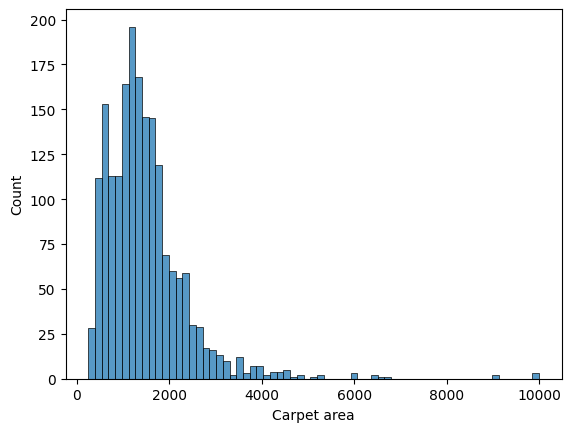

In [241]:
sns.histplot(df['Carpet area'])

In [242]:
px.box(df['Carpet area'])

In [243]:
df[df['Carpet area']>=6000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
689,flat,ats triumph,sector 104,4.45,6846.0,6500.146071,Carpet area: 6500 (603.87 sq.m.),4.0,5.0,3,27.0,North,Relatively New Property,NaN,NaN,6500.0,0,0,0,0,0,0,111.0
780,flat,tata gurgaon gateway,sector 113,6.00,9139.0,6565.269723,Carpet area: 6565 (609.91 sq.m.),5.0,6.0,3,24.0,North,Moderately Old,NaN,NaN,6565.0,0,0,0,0,0,0,142.0
1603,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.000000,Carpet area: 10000 (929.03 sq.m.),4.0,4.0,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0,1,0,0,0,1,31.0
1605,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9000.900090,Carpet area: 9000 (836.13 sq.m.),4.0,3.0,3+,7.0,South-East,Moderately Old,NaN,NaN,9000.0,0,1,0,0,0,1,31.0
2169,flat,central park resorts,sector 48,15.00,22388.0,6700.017867,Carpet area: 6700 (622.45 sq.m.),5.0,6.0,3+,17.0,NaN,Relatively New Property,NaN,NaN,6700.0,1,1,0,1,0,1,160.0
2955,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.000000,Plot area 8000(743.22 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),5.0,6.0,3+,2.0,North-East,Relatively New Property,NaN,7000.0,6000.0,1,1,0,0,0,1,0.0
3080,house,Independent,sector 25,8.00,8000.0,10000.000000,Carpet area: 10000 (929.03 sq.m.),3.0,9.0,1,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0.0
3517,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.110000,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),7.0,8.0,3,3.0,NaN,Old Property,NaN,9000.0,6500.0,0,1,1,1,0,1,22.0
3531,house,unitech palms south city 1,sector 41,9.35,28858.0,3240.000000,Plot area 3240(301.01 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),10.0,10.0,3+,4.0,North-East,Moderately Old,NaN,7500.0,6000.0,1,1,0,0,0,1,145.0
3573,house,emaar mgf marbella,sector 66,19.00,31666.0,6000.130000,Plot area 9000(836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),5.0,6.0,0,3.0,North-East,Relatively New Property,NaN,NaN,6000.0,0,1,1,1,0,2,66.0


In [244]:
## luxury score
df['luxury_score'].describe()

,luxury_score
count,3581.000000
mean,71.795867
std,53.012779
min,0.000000
25%,33.000000
50%,60.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

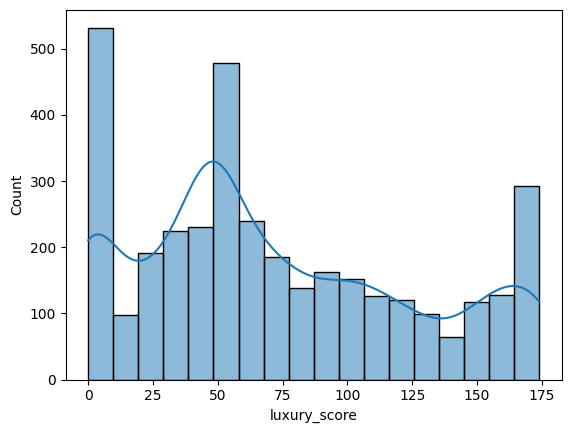

In [245]:
sns.histplot(df['luxury_score'],kde=True)

In [246]:
df.shape

(3632, 23)

In [247]:
df['Price_per_sqrt']=round(((df['price']*10000000)/df['Area']))

<Axes: xlabel='Price_per_sqrt', ylabel='Count'>

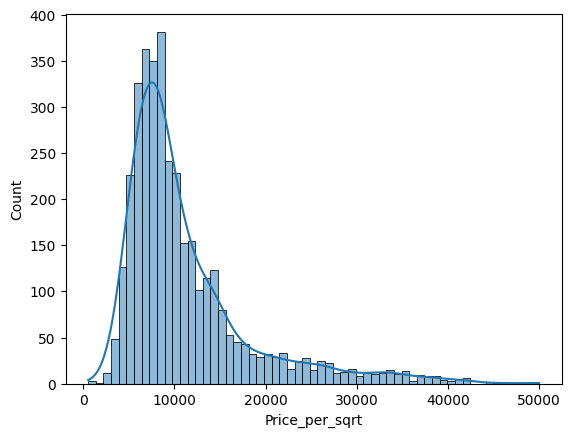

In [248]:
sns.histplot(df['Price_per_sqrt'],kde=True)

In [249]:
px.box(df['Price_per_sqrt'])

In [250]:
df[df['Price_per_sqrt']>44000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2800,flat,lig flat,sector 40,1.5,50000.0,300.00,Built Up area: 300 (27.87 sq.m.),1.0,1.0,3,0.0,NaN,undefined,NaN,300.0,NaN,0,0,0,0,0,1,66.0
3261,house,Independent,sector 25,13.0,45710.0,2844.02,Plot area 316(264.22 sq.m.),6.0,8.0,2,NaN,NaN,Relatively New Property,NaN,2844.0,NaN,1,1,1,1,0,1,53.0
3303,house,Independent,sector 105,9.9,49500.0,2000.00,Built Up area: 2000 (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2.0,2.0,2,3.0,North,undefined,NaN,2000.0,1800.0,0,0,0,0,0,1,122.0
3470,house,Independent,sector 26,20.0,44444.0,4500.05,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New Property,NaN,4500.0,NaN,0,1,0,1,0,2,160.0
3563,house,sushant lok,sector 43,13.0,48148.0,2700.01,Plot area 300(250.84 sq.m.),3.0,3.0,1,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,114.0
3680,house,Independent,sector 55,5.0,44444.0,1125.01,Plot area 125(104.52 sq.m.)Built Up area: 115 sq.yards (96.15 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),9.0,9.0,3,5.0,East,New Property,NaN,1035.0,900.0,0,0,0,0,1,2,NaN


In [251]:
## properties with unreasonably small room sizes
x=df[df['Price_per_sqrt']<=20000]
(x['Area']/x['bedRoom']).quantile(0.02)

188.7690305926826

In [253]:
df[(df['Area']/df['bedRoom'])<188.7690305926826].shape

(78, 23)

In [255]:
## there are the property with  unreasonably small room sizes
## we have to correct it for our analytical model ,predictive model and  recommender system
df[(df['Area']/df['bedRoom'])<188.7690305926826].sort_index()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2875,house,Independent,sector 38,2.10,23333.0,900.01,Plot area 100(83.61 sq.m.),7.0,7.0,3+,3.0,North-East,Relatively New Property,NaN,900.0,NaN,1,0,1,1,0,0,52.0
2978,house,Independent,sector 12,1.00,8230.0,1215.00,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),9.0,7.0,2,3.0,North,Moderately Old,NaN,3750.0,NaN,0,0,1,1,0,0,0.0
2979,house,Independent,sector 7,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,3,3.0,East,Relatively New Property,NaN,550.0,NaN,0,0,0,0,1,0,22.0
2988,house,Independent,sector 7,0.90,10000.0,900.00,Plot area 100(83.61 sq.m.),6.0,4.0,1,3.0,North-East,Old Property,NaN,900.0,NaN,0,1,0,0,1,1,0.0
2990,house,prem kunj,sohna road road,0.50,7407.0,675.04,Plot area 675(62.71 sq.m.)Built Up area: 725 sq.ft. (67.35 sq.m.)Carpet area: 675 sq.ft. (62.71 sq.m.),5.0,4.0,2,3.0,South-West,Relatively New Property,NaN,725.0,675.0,0,0,0,1,0,0,8.0
2992,house,Independent,sector 105,0.60,13333.0,450.01,Built Up area: 450 (41.81 sq.m.),3.0,3.0,3,3.0,NaN,undefined,NaN,450.0,NaN,0,0,0,0,0,0,0.0
2993,house,Independent,sector 3 phase 3 extension,0.50,11111.0,450.00,Plot area 450(41.81 sq.m.),5.0,3.0,3,3.0,NaN,Moderately Old,NaN,4050.0,NaN,0,0,0,0,0,0,9.0
3004,house,Independent,manesar,0.80,6666.0,1200.12,Plot area 1200(111.48 sq.m.),8.0,8.0,3,1.0,NaN,Relatively New Property,NaN,1200.0,NaN,0,0,0,0,0,0,0.0
3012,house,Independent,sector 12,0.90,13333.0,675.02,Built Up area: 675 (62.71 sq.m.),4.0,4.0,2,2.0,NaN,undefined,NaN,675.0,NaN,0,0,0,0,0,1,0.0
3013,house,my home,sector 110,0.34,12592.0,270.01,Plot area 270(25.08 sq.m.),2.0,2.0,3,3.0,West,Moderately Old,NaN,2430.0,NaN,0,0,0,0,0,1,0.0


In [256]:
df.to_csv('gurgaon_property_data_after_outliers_treatment',index=False)